In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
fifa = pd.read_csv('fifa_data.csv')

In [3]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
columns = ['Unnamed: 0','Flag', 'ID', 'Photo', 'Nationality', 'Flag','Club', 'Club Logo','Special','Real Face','Jersey Number',
           'Joined', 'Loaned From', 'Contract Valid Until']
fifa.drop(columns=columns, inplace=True)

In [5]:
fifa.drop(index=fifa[fifa['Preferred Foot'].isna()].index,inplace=True)
fifa.drop(index=fifa[fifa['Position'].isna()].index,inplace=True)

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18147 non-null  object 
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  object 
 5   Wage                      18147 non-null  object 
 6   Preferred Foot            18147 non-null  object 
 7   International Reputation  18147 non-null  float64
 8   Weak Foot                 18147 non-null  float64
 9   Skill Moves               18147 non-null  float64
 10  Work Rate                 18147 non-null  object 
 11  Body Type                 18147 non-null  object 
 12  Position                  18147 non-null  object 
 13  Height                    18147 non-null  object 
 14  Weight

In [7]:
fifa.groupby(fifa['Position']=='GK').sum()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Position,,,,,,,,,,,,,,,,,,,,,
False,403135,1071488,1152975,17984.0,48440.0,40829.0,873732.0,802267.0,920005.0,1009926.0,...,840456.0,972969.0,827269.0,837010.0,800211.0,169266.0,170191.0,170089.0,169752.0,169417.0
True,52738,130822,141343,2219.0,5042.0,2025.0,28871.0,24333.0,29097.0,55220.0,...,40515.0,91373.0,30831.0,28636.0,28496.0,132281.0,127308.0,124492.0,127671.0,133856.0


In [8]:
fifa.loc[fifa['Position']=='GK']['LS']

3        NaN
9        NaN
18       NaN
19       NaN
22       NaN
        ... 
18178    NaN
18180    NaN
18183    NaN
18194    NaN
18198    NaN
Name: LS, Length: 2025, dtype: object

In [9]:
fifa.isnull().sum()[fifa.isnull().sum()>0]

LS                2025
ST                2025
RS                2025
LW                2025
LF                2025
CF                2025
RF                2025
RW                2025
LAM               2025
CAM               2025
RAM               2025
LM                2025
LCM               2025
CM                2025
RCM               2025
RM                2025
LWB               2025
LDM               2025
CDM               2025
RDM               2025
RWB               2025
LB                2025
LCB               2025
CB                2025
RCB               2025
RB                2025
Release Clause    1504
dtype: int64

In [10]:
fifa.fillna(value=0,inplace=True)

In [11]:
fifa.isnull().sum()

Name              0
Age               0
Overall           0
Potential         0
Value             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 76, dtype: int64

In [12]:
fifa['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18147, dtype: object

In [13]:
def CurrenccyChange(money):
    if money[-1] == 'M':
        value = float(money[1:-1])*1e6
        return value
    elif money[-1] == 'K':
        value = float(money[1:-1])*1e3
        return value
    else:
        return 0
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val

In [14]:
fifa['Value'] = fifa['Value'].apply(CurrenccyChange)

In [15]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for column in skill_columns:
    fifa[column] = fifa[column].apply(skillConverter)

In [16]:
fifa['Position'] = fifa['Position'].apply(position_simplifier)

In [17]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18147 non-null  object 
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  float64
 5   Wage                      18147 non-null  object 
 6   Preferred Foot            18147 non-null  object 
 7   International Reputation  18147 non-null  float64
 8   Weak Foot                 18147 non-null  float64
 9   Skill Moves               18147 non-null  float64
 10  Work Rate                 18147 non-null  object 
 11  Body Type                 18147 non-null  object 
 12  Position                  18147 non-null  object 
 13  Height                    18147 non-null  object 
 14  Weight

# Classification

In [18]:
fifa_ml = fifa.copy()

In [19]:
y = fifa_ml['Position']
X = fifa_ml.drop(columns=['Name','Body Type','Height', 'Weight'])

In [20]:
X = pd.get_dummies(X)

In [21]:
def position_num(pos):
    if pos == 'GK':
        return 0
    elif pos == 'D':
        return 1
    elif pos == 'M':
        return 2
    else:
        return 3

fifa_ml['Position'] = fifa_ml['Position'].apply(position_num)

In [22]:
X.select_dtypes(exclude=object).columns

Index(['Age', 'Overall', 'Potential', 'Value', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'LS', 'ST', 'RS',
       ...
       'Release Clause_€98K', 'Release Clause_€990K', 'Release Clause_€991K',
       'Release Clause_€992K', 'Release Clause_€994K', 'Release Clause_€997K',
       'Release Clause_€998K', 'Release Clause_€999K', 'Release Clause_€99K',
       'Release Clause_€9M'],
      dtype='object', length=1471)

In [23]:
print(X.columns[:68])

Index(['Age', 'Overall', 'Potential', 'Value', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Wage_€0'],
      dtype='object')


In [24]:
columns =['Age', 'Overall', 'Potential', 'Value', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
       'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.2, random_state=42)


In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [26]:
clr = LogisticRegression(max_iter=500)
clr.fit(X_train,y_train)

D:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9154269972451791
              precision    recall  f1-score   support

           D       0.93      0.93      0.93      1157
           F       0.86      0.85      0.86       525
          GK       1.00      1.00      1.00       407
           M       0.90      0.91      0.90      1541

    accuracy                           0.92      3630
   macro avg       0.92      0.92      0.92      3630
weighted avg       0.92      0.92      0.92      3630



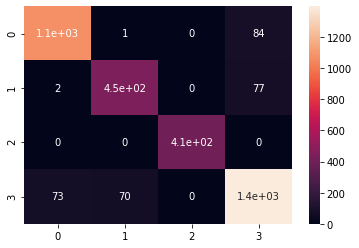

In [27]:
predict = clr.predict(X_test)
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
sns.heatmap(confusion_matrix(y_test,predict), annot=True)

### RegressionTree

In [28]:
crf = RandomForestClassifier(max_depth= 60, min_samples_split=2, n_estimators=600)
crf.fit(X_train,y_train)
crf1 = RandomForestClassifier()
crf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.918732782369146
              precision    recall  f1-score   support

           D       0.92      0.94      0.93      1157
           F       0.88      0.85      0.87       525
          GK       1.00      1.00      1.00       407
           M       0.91      0.90      0.90      1541

    accuracy                           0.92      3630
   macro avg       0.93      0.92      0.93      3630
weighted avg       0.92      0.92      0.92      3630



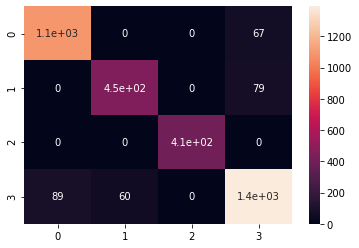

In [50]:
predict_forest = crf.predict(X_test)
print(accuracy_score(y_test,predict_forest))
print(classification_report(y_test,predict_forest))
sns.heatmap(confusion_matrix(y_test,predict_forest), annot=True)



0.918732782369146
              precision    recall  f1-score   support

           D       0.93      0.94      0.93      1157
           F       0.87      0.86      0.87       525
          GK       1.00      1.00      1.00       407
           M       0.91      0.90      0.90      1541

    accuracy                           0.92      3630
   macro avg       0.93      0.93      0.93      3630
weighted avg       0.92      0.92      0.92      3630



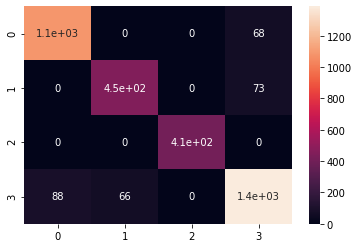

In [51]:
predict_forest1 = crf1.predict(X_test)
print(accuracy_score(y_test,predict_forest1))
print(classification_report(y_test,predict_forest1))
sns.heatmap(confusion_matrix(y_test,predict_forest1), annot=True)

In [47]:
n_estimators = [int(x) for x in np.linspace(100,2000,20)]
min_samples_split = [int(x) for x in np.linspace(2,15,5)]
max_features = ['auto','log2']
criterion = ['gini','entrpopy']
min_samples_leaf = [1, 2, 4]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [48]:
# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf,random_grid,n_iter=100,cv=5,n_jobs=-1,random_state=42)
# rs.fit(X_train,y_train)

In [49]:
rs.best_params_

NameError: name 'rs' is not defined

In [57]:
fifa_ml.corr().abs()['Position'].sort_values(ascending=False).tail(50)

RM                          0.701364
Dribbling                   0.696398
ShotPower                   0.687332
BallControl                 0.669807
GKDiving                    0.637548
RCM                         0.637297
LCM                         0.637297
CM                          0.637297
GKReflexes                  0.636032
GKHandling                  0.634980
GKPositioning               0.633580
GKKicking                   0.632453
Skill Moves                 0.590134
Curve                       0.574083
ShortPassing                0.536110
Agility                     0.527498
FKAccuracy                  0.522632
Vision                      0.516432
Acceleration                0.515991
SprintSpeed                 0.507956
HeadingAccuracy             0.478050
Balance                     0.449887
Crossing                    0.447057
RWB                         0.444636
LWB                         0.444636
Stamina                     0.429684
RDM                         0.409399
C

# Regression

In [60]:
fifa_ml.corr().abs()['Overall'].sort_values(ascending=False).tail(50)
fifa_ml.columns
X = fifa_ml.drop(columns=['Name','Age','Potential','International Reputation'])

In [72]:
# X.drop(columns=['Overall'], inplace = True)
X.drop(columns = ['Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Height', 'Weight',
       'Release Clause'],inplace =True)

In [65]:
y = fifa_ml['Overall'].copy()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X.select_dtypes(include=object).columns

Index([], dtype='object')

In [76]:
linmodel = LinearRegression()

In [77]:
linmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
predict_lin = linmodel.predict(X_test)


In [81]:
print('MSE: ',mean_squared_error(y_test,predict_lin))
print('R2: ',r2_score(y_test,predict_lin))

MSE:  5.332013515477622
R2:  0.8856251994450202


In [83]:
logmodel = LogisticRegression()

In [89]:
logmodel.fit(X_train,y_train)
predict_log = logmodel.predict(X_test)

D:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
print('MSE: ',mean_squared_error(y_test,predict_log))
print('R2: ',r2_score(y_test,predict_log))

MSE:  121.99173553719008
R2:  -1.6167938961370236


In [91]:
forestmodel = RandomForestRegressor(min_samples_split=6)
forestmodel.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
predict_forest = forestmodel.predict(X_test)
print('MSE: ',mean_squared_error(y_test,predict_forest))
print('R2: ',r2_score(y_test,predict_forest))

MSE:  0.7689289216278528
R2:  0.9835060260449727


ValueError: x, y, and format string must not be None

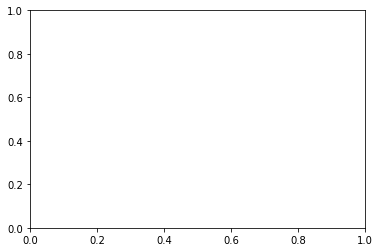

1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 0, 0, 4, 0, 0, 0, 0, 0]